## Problem Statement 1: Write Load the "Country-data.csv" dataset into a DataFrame and perform the following tasks:

1. Create a seperate DataFrame with only numeric data by remove the "country" column

2. Scale the data using the Standard Scaler to create a scaled DataFrame

3. Plotting dendograms with the complete linkage method

4. Creating cluster labels using cut tree

5. Perform the 4-Component PCA on DataFrame

6. Now, from final the DataFrame, analyze how low GDP rate corresponds to the child
mortality rate around the world

In [1]:
# 1. Create a seperate DataFrame with only numeric data by remove the "country" column

import pandas as pd
data1= pd.read_csv("Assignment_5_Datasets/Country-data.csv")
data1.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2]:
data1.drop("country", axis=1, inplace=True)
col=data1.columns
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# 2. Scale the data using the Standard Scaler to create a scaled DataFrame

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data1= scale.fit_transform(data1)
data1= pd.DataFrame(data1, columns=col )
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


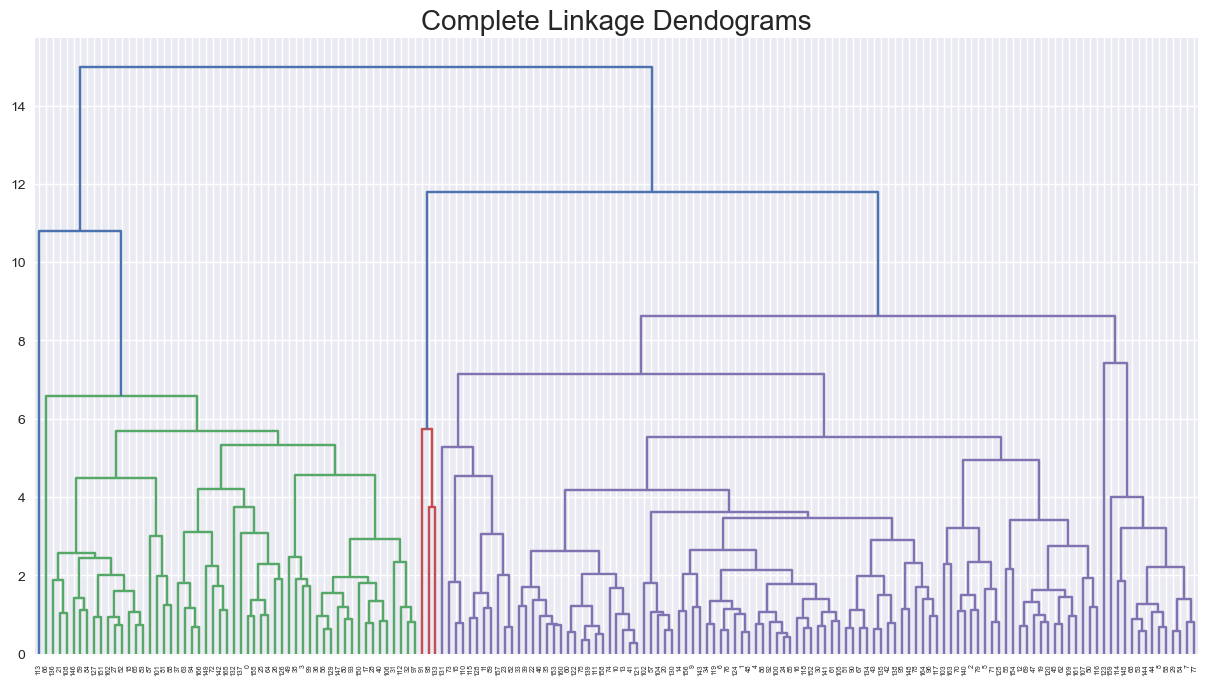

In [4]:
# 3. Plotting dendograms with the complete linkage method

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

link = linkage(data1, method='complete')
plt.style.use("seaborn")
plt.figure(figsize=(15,8))
plt.title("Complete Linkage Dendograms", fontsize=20) 
dendrogram(link)
plt.show()

In [5]:
# 4. Creating cluster labels using cut tree

from scipy.cluster.hierarchy import cut_tree
cluster_labels = cut_tree(link, n_clusters=4).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [6]:
data1_new= data1.copy()
data1_new["Hierarchical_Cluster_labels"] = cluster_labels
data1_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_Cluster_labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


In [7]:
# 5. Perform the 4-Component PCA on DataFrame

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_final = pca.fit_transform(data1)
print(pca_final.shape)
pca_final = pd.DataFrame(pca_final, columns=["PC1","PC2","PC3","PC4"])
pca_final["Hierarchical_Cluster_labels"] = cluster_labels
pca_final.head()

(167, 4)


,PC1,PC2,PC3,PC4,Hierarchical_Cluster_labels
0,-2.913025,0.095621,-0.718118,1.005255,0
1,0.429911,-0.588156,-0.333486,-1.161059,1
2,-0.285225,-0.455174,1.221505,-0.868115,1
3,-2.932423,1.695555,1.525044,0.839625,0
4,1.033576,0.136659,-0.225721,-0.847063,1


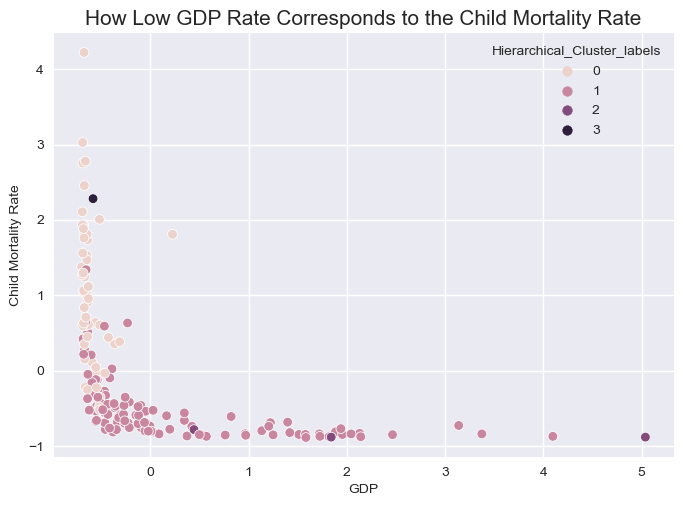

In [8]:
# 6. Now, from final the DataFrame, analyze how low GDP rate corresponds to the child mortality rate around the world

import seaborn as sns
ax = sns.scatterplot(x='gdpp',y='child_mort',data = data1_new,hue='Hierarchical_Cluster_labels')
ax.set_xlabel('GDP', fontsize = 10)
ax.set_ylabel('Child Mortality Rate', fontsize = 10)
ax.set_title('How Low GDP Rate Corresponds to the Child Mortality Rate', fontsize = 15);

## Problem Statement 2: Write a Python program that reads the “Credit Card Customer Data.csv”(provided on LMS) The following are the tasks that need to be taken into consideration whileconstructing the solution to Segregate customers based on the data provided with the help of kmeans clustering.

Tasks to be performed:

1. Load the Given CSV file into a DataFrame

2. Find missing values and drop the unnecessary columns

3. Univariate and bivariate analysis

4. Standardize the whole dataset

5. Find the within-cluster sum of square

6. Find silhouette score

7. Use a line plot using matplotlib to find scores for different sizes of K and choose the bestsize for the cluster and build the final model

8. Observe Cluster behavior with different columns

9. Print Co-ordinates of all centroids and silhouette scores for the final model


In [9]:
# 1. Load the Given CSV file into a DataFrame


import pandas as pd
data2= pd.read_csv("Assignment_5_Datasets/Credit Card Customer Data.csv")
data2.head()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [10]:
# 2. Find missing values and drop the unnecessary columns
print(data2.shape)
data2.info()

(660, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [11]:
data2.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [12]:
data2.drop(["Sl_No","Customer Key"], axis=1, inplace= True)
data2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


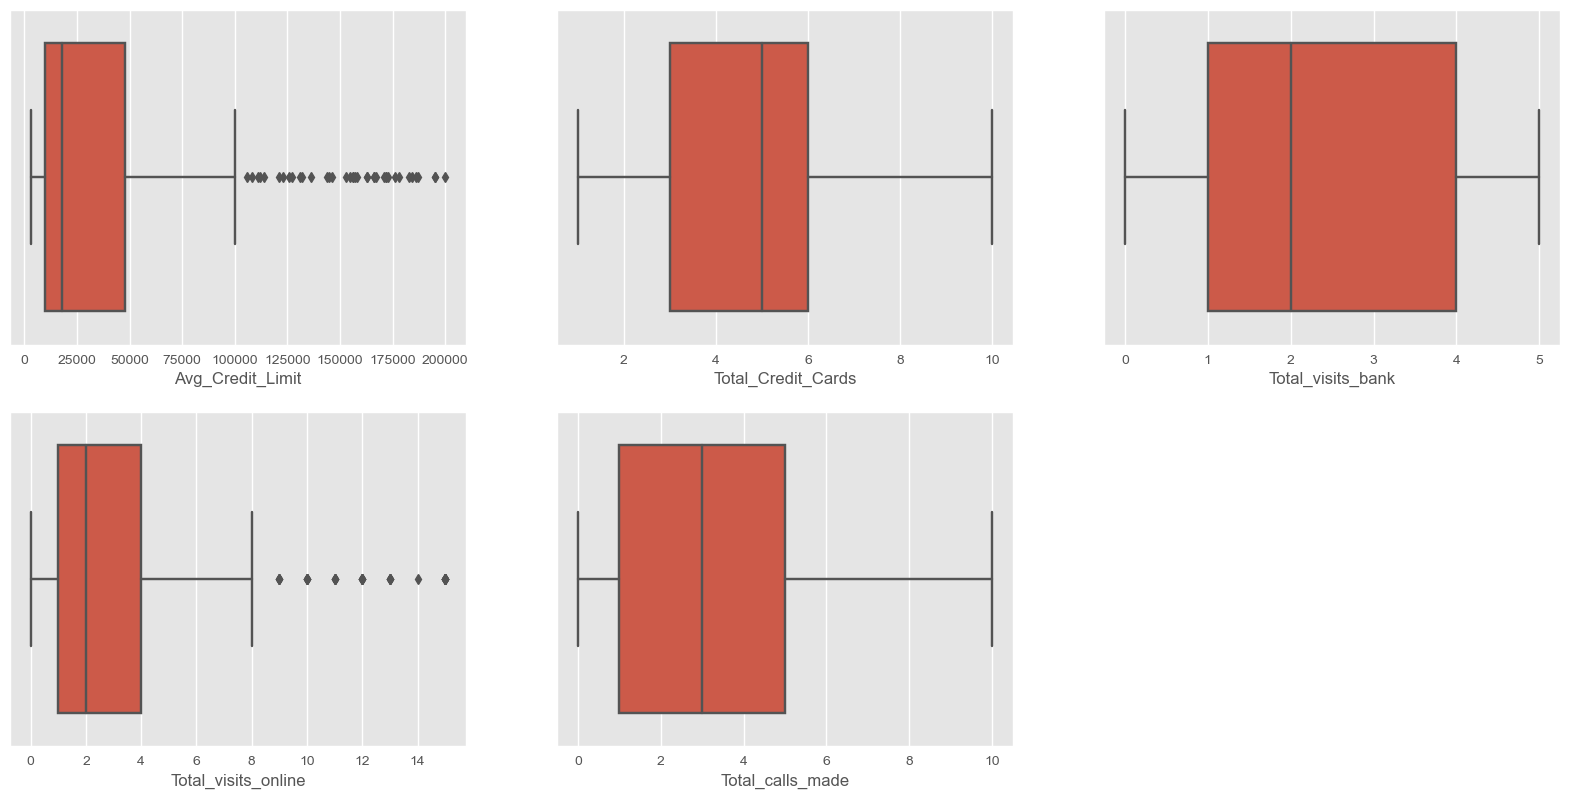

In [13]:
# 3. Univariate and bivariate analysis

i=1
plt.figure(figsize=(20,20))
plt.style.use("ggplot")
for j in data2.columns:
    plt.subplot(4,3,i)
    sns.boxplot(data=data2,x=j)
    i+=1

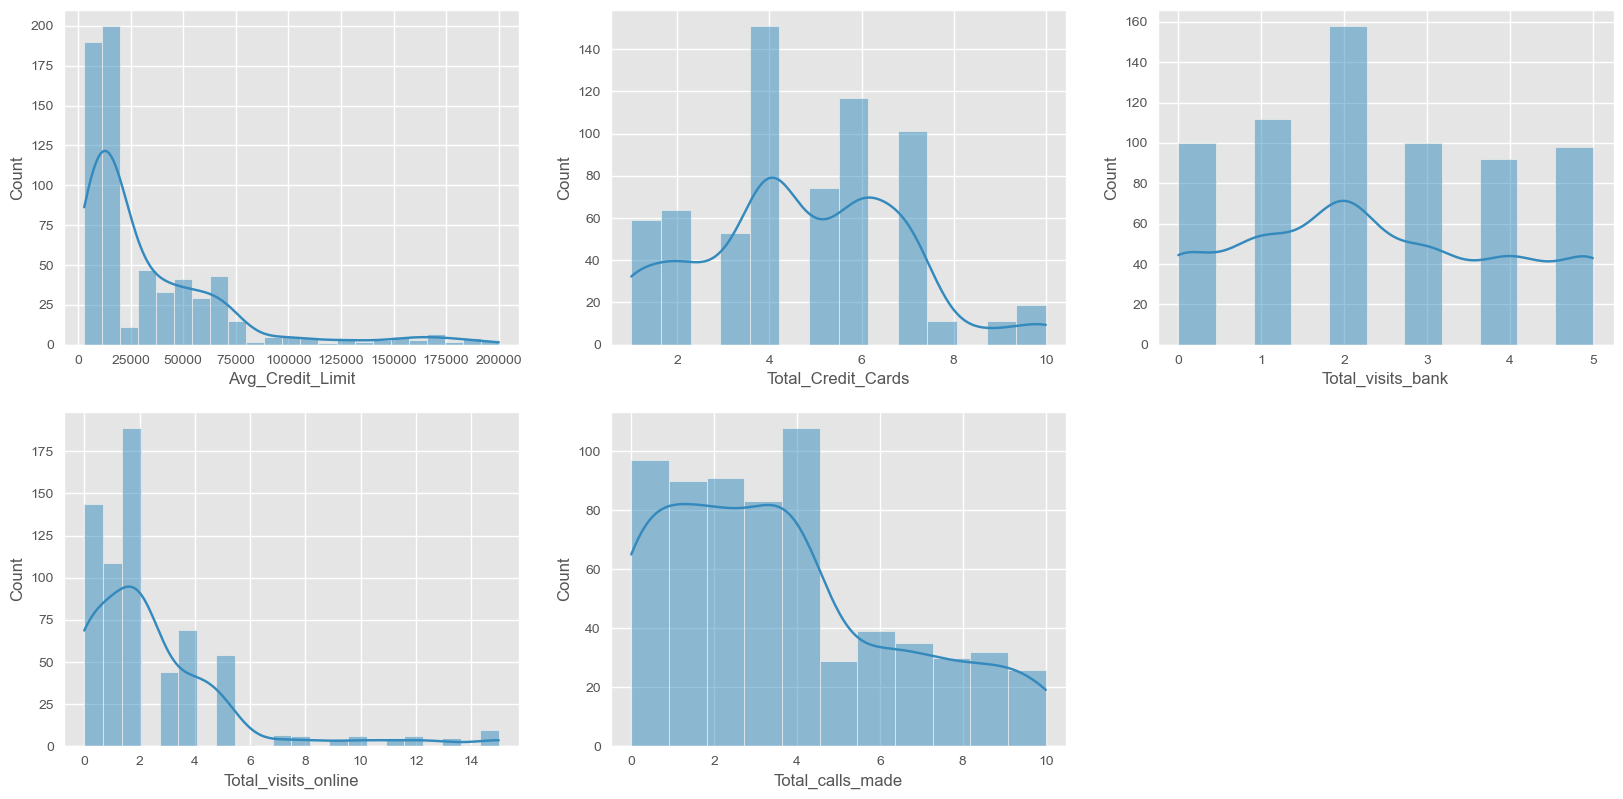

In [14]:
i=1
plt.figure(figsize=(20,20))
plt.style.use("ggplot")

for j in data2.columns:
    plt.subplot(4,3,i)
    sns.histplot(x=data2[j],kde=True)
    i+=1

<AxesSubplot:>

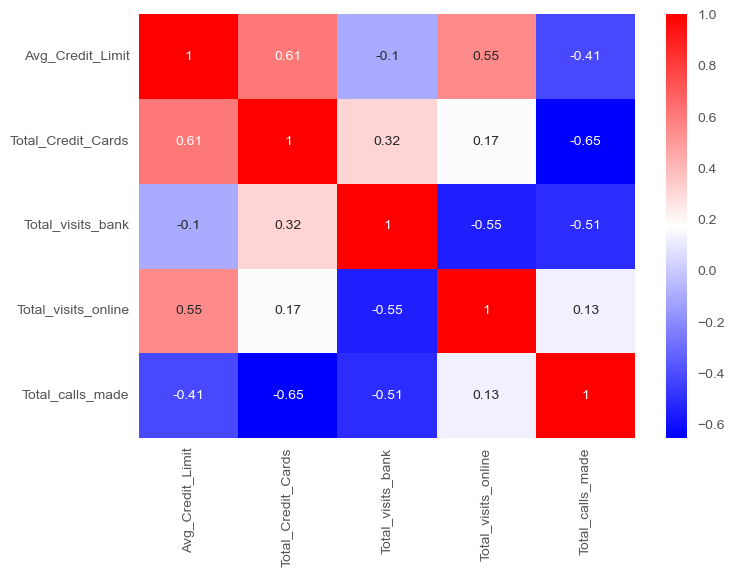

In [15]:
sns.heatmap(data2.corr(), cmap='bwr', annot=True)

In [16]:
# 4.Standardize the whole dataset
col2= data2.columns
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data2_scaled= scale.fit_transform(data2)
data2_scaled= pd.DataFrame(data2_scaled, columns=col2 )
data2_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


[3300.0000000000005, 2040.9898164784954, 933.0437490000534, 780.7736895551768, 704.7077507040724, 642.1685552657884, 600.199220198979, 563.460540898308, 540.8961727432905, 512.027423799817]


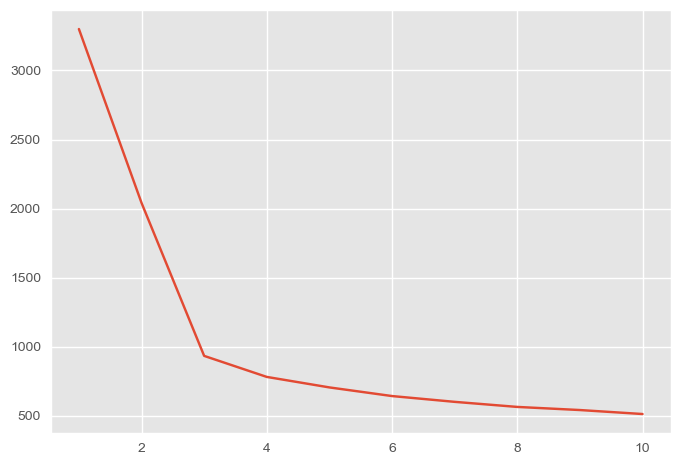

In [17]:
# 5. Find the within-cluster sum of square
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

within_cluster_sum=[]
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(data2_scaled)
    within_cluster_sum.append(km.inertia_)

print(within_cluster_sum)
plt.plot(range(1,11),within_cluster_sum);

[0.41842496663215445, 0.5157182558881063, 0.3556670619372605, 0.2726898791817692, 0.2559338705826332, 0.2479738478327007, 0.218823262425414, 0.2250352496864726, 0.2256089935000764]


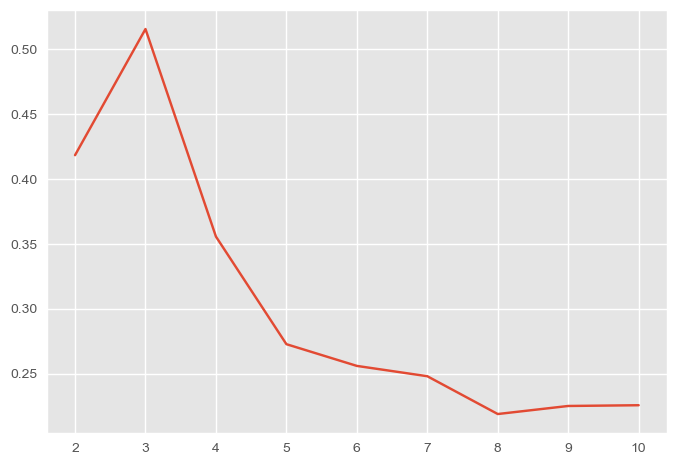

In [18]:
# 6. Find silhouette score

from sklearn.metrics import silhouette_score
silh_score=[]
for i in range(2,11):
    km=KMeans(n_clusters=i)
    km.fit(data2_scaled)
    silh_score.append(silhouette_score(data2_scaled, km.labels_))
    
print(silh_score)
plt.plot(range(2,11),silh_score);

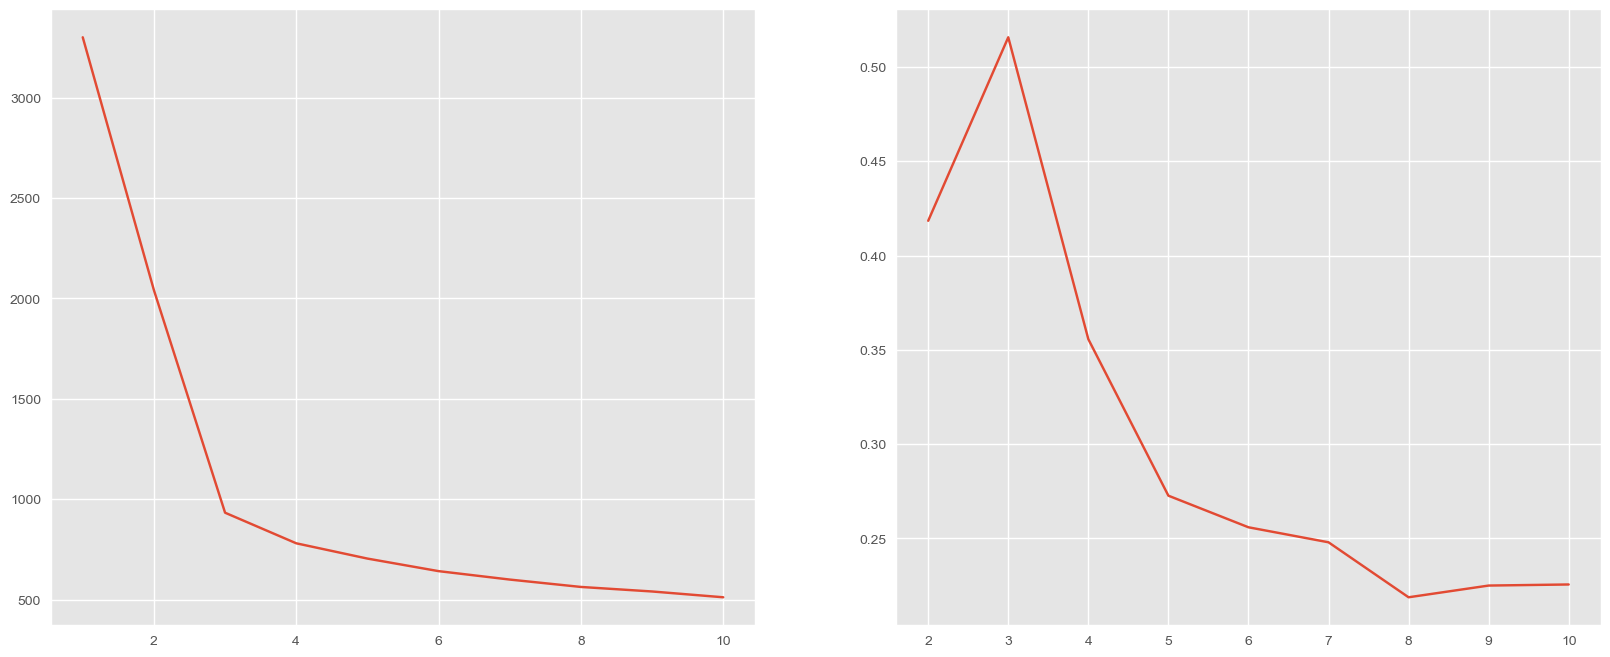

In [19]:
# 7.Use a line plot using matplotlib to find scores for different sizes of K and choose the bestsize for the cluster
# and build the final model


plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(range(1,11),within_cluster_sum);


plt.subplot(1,2,2)
plt.plot(range(2,11),silh_score);




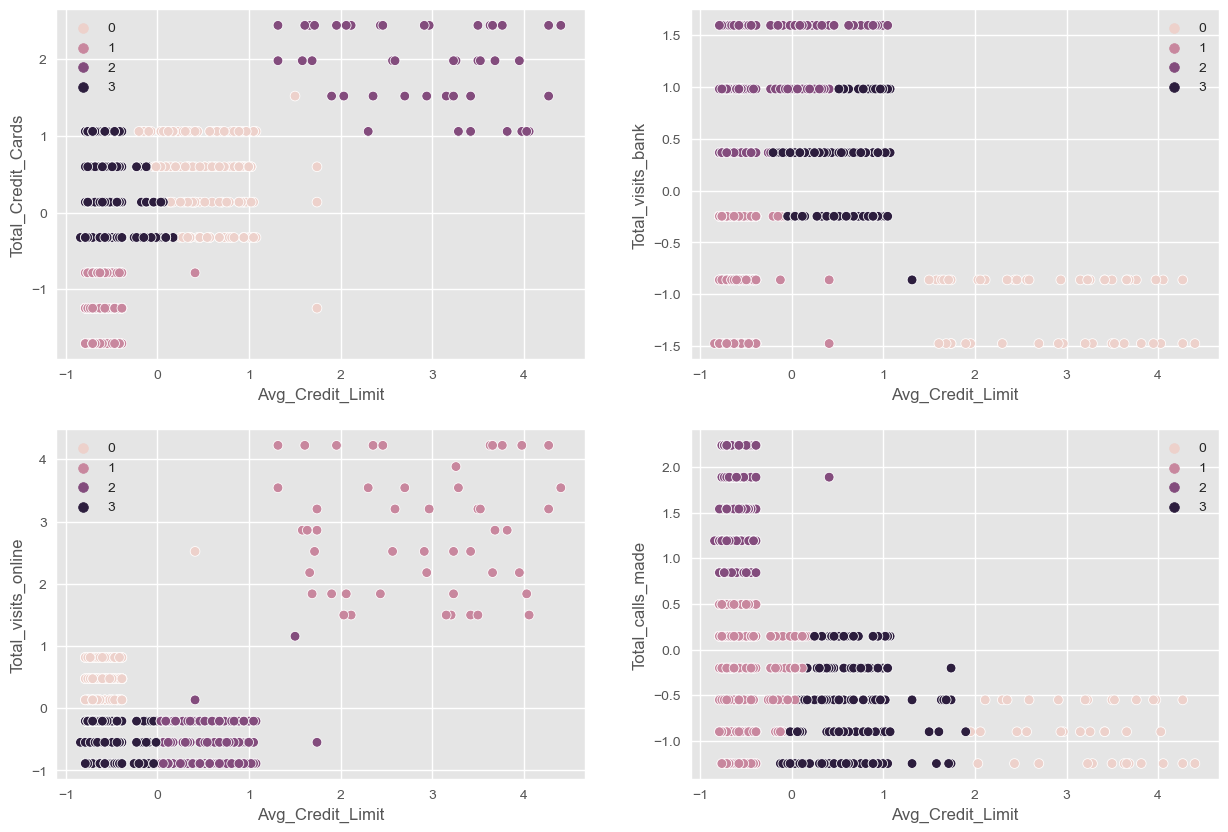

In [20]:
# 8. Observe Cluster behavior with different columns
j = data2_scaled.columns
plt.figure(figsize=(15,10))
for i in range(1,len(j)):
    data = data2_scaled[[j[0],j[0+i]]]
    km=KMeans(n_clusters= 4)
    km.fit(data)
    plt.subplot(2,2,i)
    sns.scatterplot(x=j[0],y=j[0+i],data = data,hue=km.labels_)


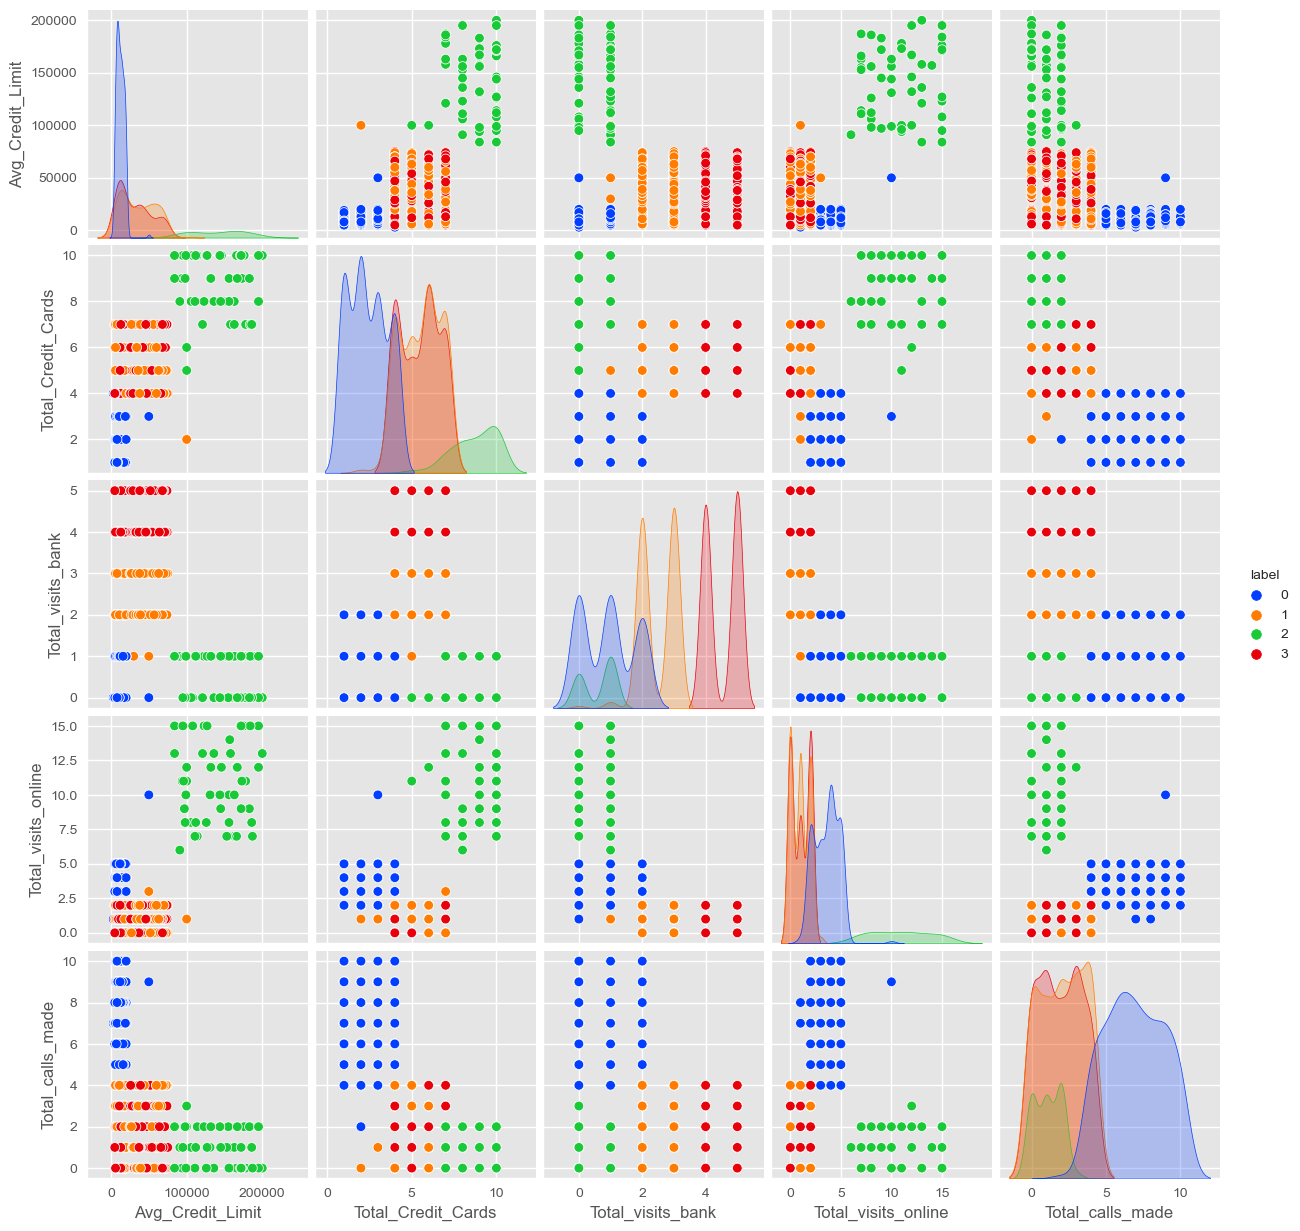

In [21]:
km1=KMeans(n_clusters=4)
km1.fit(data2_scaled)
y= km1.predict(data2_scaled)
data2['label']=y
sns.pairplot(data2,hue='label',palette='bright')

In [22]:
# 9. Print Co-ordinates of all centroids and silhouette scores for the final model
centroids= km1.cluster_centers_# centre of clustering 
centroids

array([[-0.59597409, -1.06749333, -0.904851  ,  0.33018588,  1.16645969],
       [ 0.03538264,  0.37695296,  0.04560145, -0.55776778, -0.52667828],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983],
       [-0.08904777,  0.35679514,  1.29571325, -0.54390138, -0.5750638 ]])

In [23]:
Kmean_silihoute= silhouette_score(data2_scaled,km1.labels_)
Kmean_silihoute

0.3556670619372605

## Problem Statement 3: DBSCAN Clustering

Load the "Mall_Customers.csv" dataset into a DataFrame to perform the following tasks:

1. Find the correlation among the all the columns and drop the column/s with the least correlation

2. Encode the "Gender" column using get_dummies() function

3. Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4

4. Print the size of each cluster and also the size of outliers' cluster

5. Using a scatter plot shows how annual income corresponds to the spending rates of customers

In [24]:
# 1. Find the correlation among the all the columns and drop the column/s with the least correlation

import pandas as pd
data3= pd.read_csv("Assignment_5_Datasets/Mall_Customers.csv")
data3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot:>

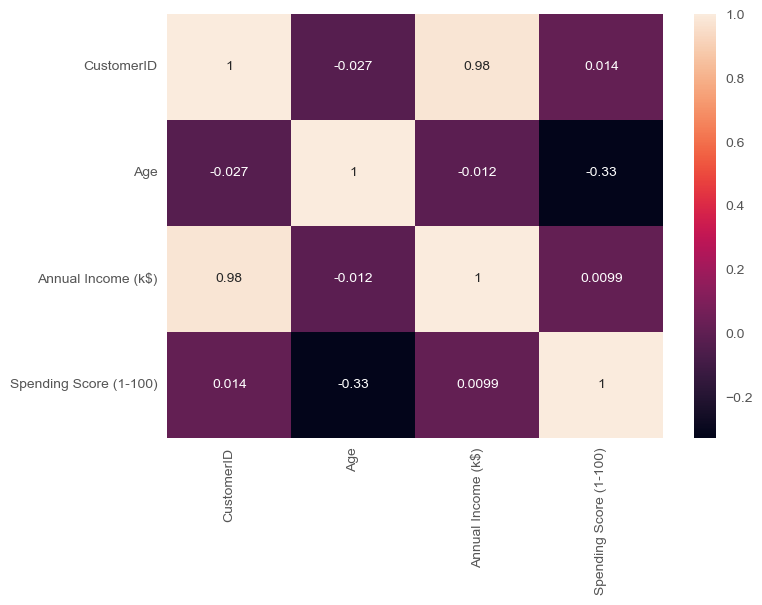

In [27]:
sns.heatmap(data3.corr(), annot=True)

In [29]:
data3=data3.drop(['CustomerID'],axis=1)
data3.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [30]:
# 2. Encode the "Gender" column using get_dummies() function

data3= pd.get_dummies(data3, columns = ['Gender'])
data3.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [32]:
# 3. Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(data3)

DBSCAN_clustered = data3.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ 

In [33]:
# 4. Print the size of each cluster and also the size of outliers' cluster

DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


Text(0.5, 1.0, 'How annual income corresponds to the spending rate ')

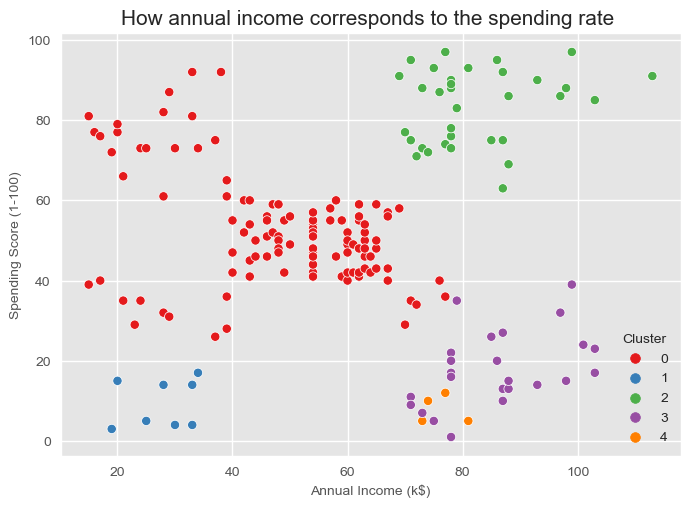

In [34]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

ax=sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', legend='full', s=45)

ax.set_xlabel('Annual Income (k$)', fontsize = 10)
ax.set_ylabel('Spending Score (1-100)', fontsize = 10)
ax.set_title('How annual income corresponds to the spending rate ', fontsize = 15)

## Problem Statement 4: Write a Python program that reads the Groceries data.csv (provided on LMS) file into a DataFrame. The following are the tasks that need to be taken into consideration while constructing the solution to using the apriori algorithm and list out items that are sold most frequently with other items. Dataset file contains tabular data, where it has items, date, member number, day of the month, day of the week, etc.

Tasks to be performed:

1. Install mlxtend library for further process

2. Load the Groceries data.csv data into a Data frame

3. Print customer data where the member number is 1001

4. Create a new column as “item count”, and give the count as 1(because all customers bought 1 item on each day only)

5. Drop unnecessary columns like "month","day","year","day_of_week"

6. Create a new data frame where all data is grouped by member id and items they bought and set their value as item count.

7. Use the Apriori algorithm and generate frequent itemsets that have the support of at least 7%

8. Generating the rules with their corresponding support, confidence, and lift

9. Filtering out the values with lift > = 1 and confidence > = 0.5


In [35]:
# 1. Install mlxtend library for further process

!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.3/1.3 MB 5.7 MB/s eta 0:00:00


In [36]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [37]:
# 2. Load the Groceries data.csv data into a Data frame

data4 = pd.read_csv("Assignment_5_Datasets/Groceries data.csv")
data4.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [39]:
# 3. Print customer data where the member number is 1001
data4[data4.Member_number == 1001]

,Member_number,Date,itemDescription,year,month,day,day_of_week
364,1001,2015-01-20,frankfurter,2015,1,20,1
5695,1001,2015-02-05,frankfurter,2015,2,5,3
6612,1001,2015-04-14,beef,2015,4,14,1
9391,1001,2014-07-02,sausage,2014,7,2,2
11046,1001,2014-12-12,whole milk,2014,12,12,4
16513,1001,2015-01-20,soda,2015,1,20,1
21844,1001,2015-02-05,curd,2015,2,5,3
22761,1001,2015-04-14,white bread,2015,4,14,1
25540,1001,2014-07-02,whole milk,2014,7,2,2
27195,1001,2014-12-12,soda,2014,12,12,4


In [40]:
# 4. Create a new column as “item count”, and give the count as 1(because all customers bought 1 item on each day only)

data4["item_count"] = 1

In [41]:
# 5. Drop unnecessary columns like "month","day","year","day_of_week"

data4 = data4.drop(columns = ["month","day","year","day_of_week"])
data4.head()

,Member_number,Date,itemDescription,item_count
0,1808,2015-07-21,tropical fruit,1
1,2552,2015-05-01,whole milk,1
2,2300,2015-09-19,pip fruit,1
3,1187,2015-12-12,other vegetables,1
4,3037,2015-01-02,whole milk,1


In [42]:
# 6. Create a new data frame where all data is grouped by member id and items they bought and set their value as item count.

data4.Member_number.value_counts()

3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: Member_number, Length: 3898, dtype: int64

In [44]:
new_data = (data4.groupby(['Member_number','itemDescription'])['item_count']
          .sum()
          .unstack()
          .reset_index()
          .fillna(0)
          .set_index('Member_number'))
new_data.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [45]:
def encode_units(x):
    if x <= 0:
        return 0    
    if x >= 1:
        return 1
new_sets = new_data.applymap(encode_units)
new_sets.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
# 7. Use the Apriori algorithm and generate frequent itemsets that have the support of at least abs7%

frequent_items = apriori(new_sets, min_support=0.07, use_colnames=True)

# 8. Generating the rules with their corresponding support, confidence, and lift

rules = association_rules(frequent_items, metric="lift", min_threshold=0.5)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(bottled beer),0.458184,0.158799,0.085428,0.186450,1.174124,0.012669,1.033988
1,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
2,(other vegetables),(bottled water),0.376603,0.213699,0.093894,0.249319,1.166680,0.013414,1.047450
3,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969
4,(bottled water),(rolls/buns),0.213699,0.349666,0.079271,0.370948,1.060863,0.004548,1.033832


In [48]:
# 9. Filtering out the values with lift > = 1 and confidence > = 0.5

rules[ (rules['lift'] >= 1 ) & (rules['confidence'] >= 0.5) ].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
8,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615
10,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795
18,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766
21,(newspapers),(whole milk),0.139815,0.458184,0.072345,0.517431,1.129310,0.008284,1.122775
